In [2]:
## importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from colorama import Fore, Style

## wczytanie danych z excela
data = pd.read_excel(r'C:\Users\lukas\Desktop\Badanie_menstruacji.xlsx', usecols=['rok_urodzenia', 'wiek_menstruacji'],
                    header=0)
## zapis do DataFrame'a
df_data = pd.DataFrame(data)
print('----------------------------------------------------------------------------------------------------------------')
## wyswietlenie pieciu pierwszych wierszy
print(df_data.head(5))
print('----------------------------------------------------------------------------------------------------------------')
## opis statystyczny danych
print(df_data.describe())
print('----------------------------------------------------------------------------------------------------------------')
## zliczenie ile jest rocznika 2000
ile_rocznik_2000 = df_data.loc[df_data['rok_urodzenia']==2000].count()
print(ile_rocznik_2000)
print('----------------------------------------------------------------------------------------------------------------')
## ile jest róznych roczników 
ile_roznych = df_data['rok_urodzenia'].value_counts()
print(ile_roznych)
## lączna liczba obserwacji
ile_obserwacji = df_data['rok_urodzenia'].count()
print('Łączna liczba obserwacji: ' + Fore.RED + str(ile_obserwacji)+ Style.RESET_ALL)
print('----------------------------------------------------------------------------------------------------------------')
## ile jest roznych wieków menstruacji
ile_wiekow_mens = df_data['wiek_menstruacji'].value_counts()
print(ile_wiekow_mens)
print('----------------------------------------------------------------------------------------------------------------')
#Creating a list of all possible answers in rok_urodzenia column
year = datetime.datetime.today().year
possible_years = list(range(year, year - 80, -1))
possible_years = possible_years[12:]
print(possible_years)
##Znajdowanie złych danych
df_data_unclear = df_data[~df_data['rok_urodzenia'].isin(possible_years)]
ile_roznych_nieprawidlowych = df_data_unclear['rok_urodzenia'].value_counts()
nieprawidlowe_obserwacje = df_data_unclear['rok_urodzenia']
print(nieprawidlowe_obserwacje)
print(ile_roznych_nieprawidlowych)
ile_obserwacji = df_data_unclear['rok_urodzenia'].count()
print('Łączna liczba nieprawidłowych obserwacji: ' + Fore.RED + str(ile_obserwacji) + Style.RESET_ALL)
print('----------------------------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------------------
   rok_urodzenia  wiek_menstruacji
0           1999                14
1           1998                12
2           1999                13
3           1999                11
4           1999                15
----------------------------------------------------------------------------------------------------------------
       rok_urodzenia  wiek_menstruacji
count    1276.000000       1276.000000
mean     1999.963166         12.098746
std        22.265691          1.481800
min      1236.000000          7.000000
25%      1998.000000         11.000000
50%      2002.000000         12.000000
75%      2004.000000         13.000000
max      2009.000000         17.000000
----------------------------------------------------------------------------------------------------------------
rok_urodzenia       87
wiek_menstruacji    87
dtype: int64
-----------------------------------------

In [11]:
## obliczenie srednich dla kazdego roku urodzenia i zapisanie ich do listy wszystkie_srednie
lata = [1992,1993,1994,1995, 1996, 1997, 1998, 1999,2000,2001,2002,2003,2004,2005,2006,2007,2008] #dodac ile i jakie sie chce
wszystkie_srednie = []
def obliczSredniaRoku(rok):
    global wszystkie_srednie
    rocznik = df_data.loc[df_data['rok_urodzenia']==rok]
    wszystkie_srednie.append(rocznik['wiek_menstruacji'].mean())

for rok in lata:
    obliczSredniaRoku(rok)
print("Średnie: " + Fore.RED +  str(wszystkie_srednie)  + Style.RESET_ALL)
print('-----------------------------------------------------------------------------------------------------------------------')
srednie_zaokraglone = [round(num,2) for num in wszystkie_srednie]
print("Średnie zaokrąglone: "+ Fore.RED + str(srednie_zaokraglone) + Style.RESET_ALL)
print('-----------------------------------------------------------------------------------------------------------------------')
## obliczenie roznicy miedzy najwieksza a najmniejsza srednia
maksymalna_srednia=max(wszystkie_srednie)
minimalna_srednia=min(wszystkie_srednie)
roznica_srednich=maksymalna_srednia-minimalna_srednia
print('Różnica między największą, a najmniejszą średnią: '+ Fore.RED + str(round(roznica_srednich,2)) + Style.RESET_ALL)
print('-----------------------------------------------------------------------------------------------------------------------')
## obliczenie sredniego wieku menstruacji
srednia_srednich = sum(wszystkie_srednie)/len(wszystkie_srednie)
print('Średni wiek menstruacji: '+ Fore.RED + str(round(srednia_srednich,2)) + Style.RESET_ALL)

Średnie: [13.0, 12.0, 12.26923076923077, 12.0, 11.785714285714286, 12.4625, 12.130952380952381, 12.235294117647058, 12.195402298850574, 12.460176991150442, 12.008403361344538, 12.246478873239436, 12.237037037037037, 11.942857142857143, 11.568181818181818, 11.038461538461538, 10.88888888888889]
-----------------------------------------------------------------------------------------------------------------------
Średnie zaokrąglone: [13.0, 12.0, 12.27, 12.0, 11.79, 12.46, 12.13, 12.24, 12.2, 12.46, 12.01, 12.25, 12.24, 11.94, 11.57, 11.04, 10.89]
-----------------------------------------------------------------------------------------------------------------------
Różnica między największą, a najmniejszą średnią: 2.11
-----------------------------------------------------------------------------------------------------------------------
Średni wiek menstruacji: 12.03


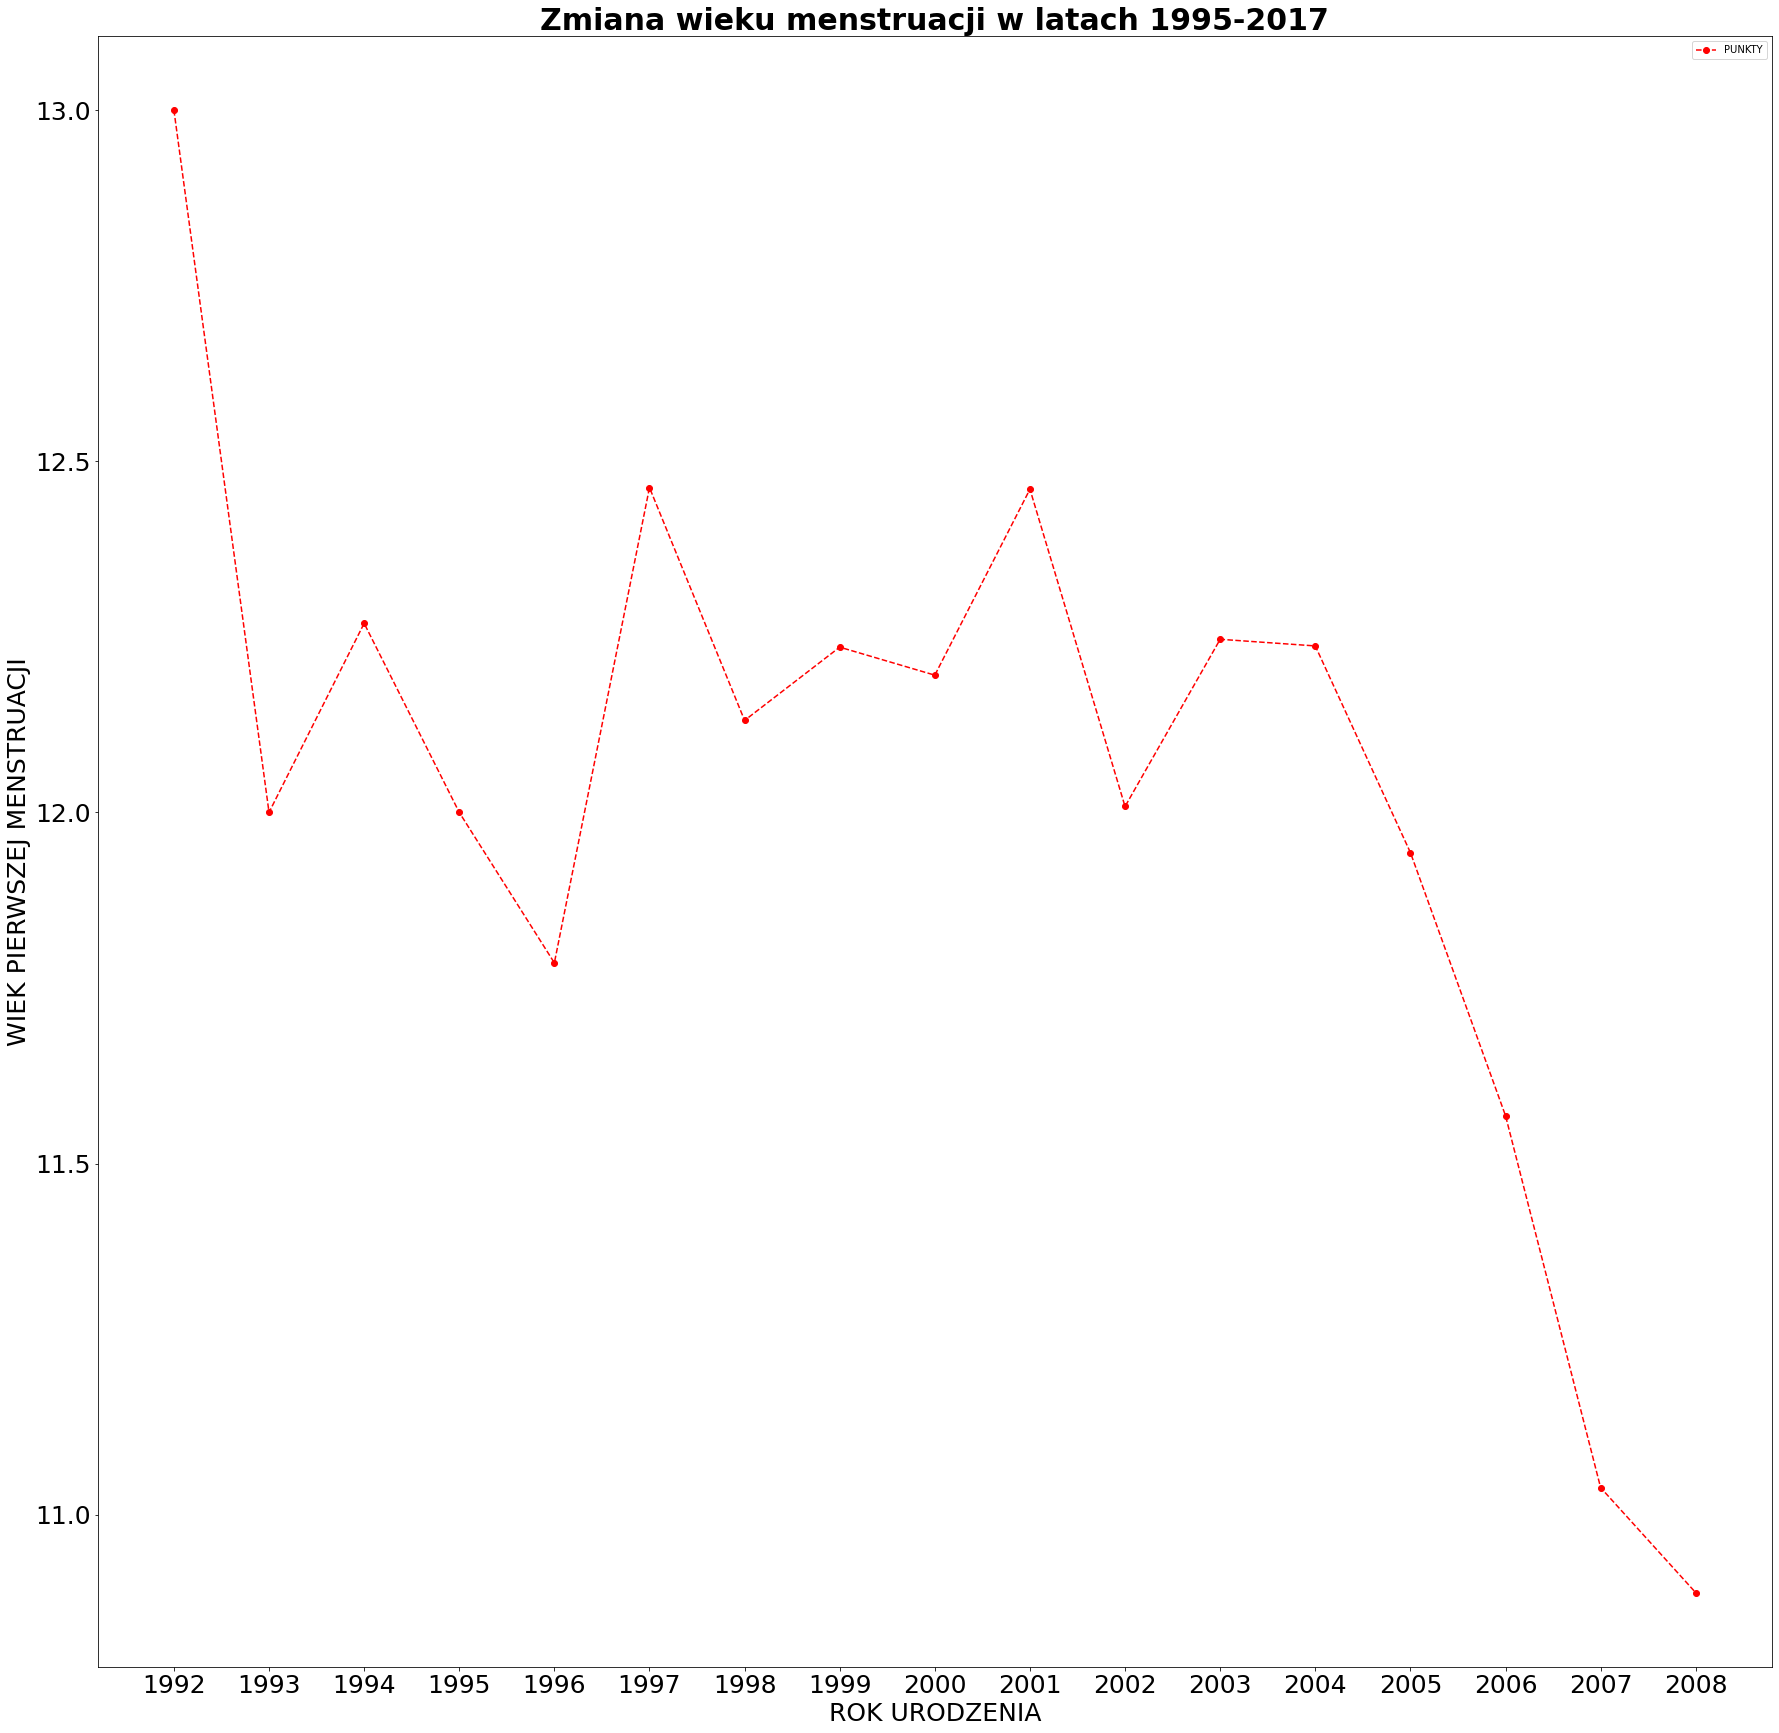

In [25]:
x = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008]
xi = list(range(len(x)))
plt.plot(xi, wszystkie_srednie, marker='o', linestyle='--', color='r', label='PUNKTY')
plt.xlabel('ROK URODZENIA', size=25)
plt.ylabel('WIEK PIERWSZEJ MENSTRUACJI',size=25) 
plt.xticks(xi, x, fontsize=25)
plt.yticks(fontsize=25)
plt.title('Zmiana wieku menstruacji w latach 1995-2017', size=30, weight='bold')
plt.rcParams["figure.figsize"]=30,30
plt.legend()
plt.show()

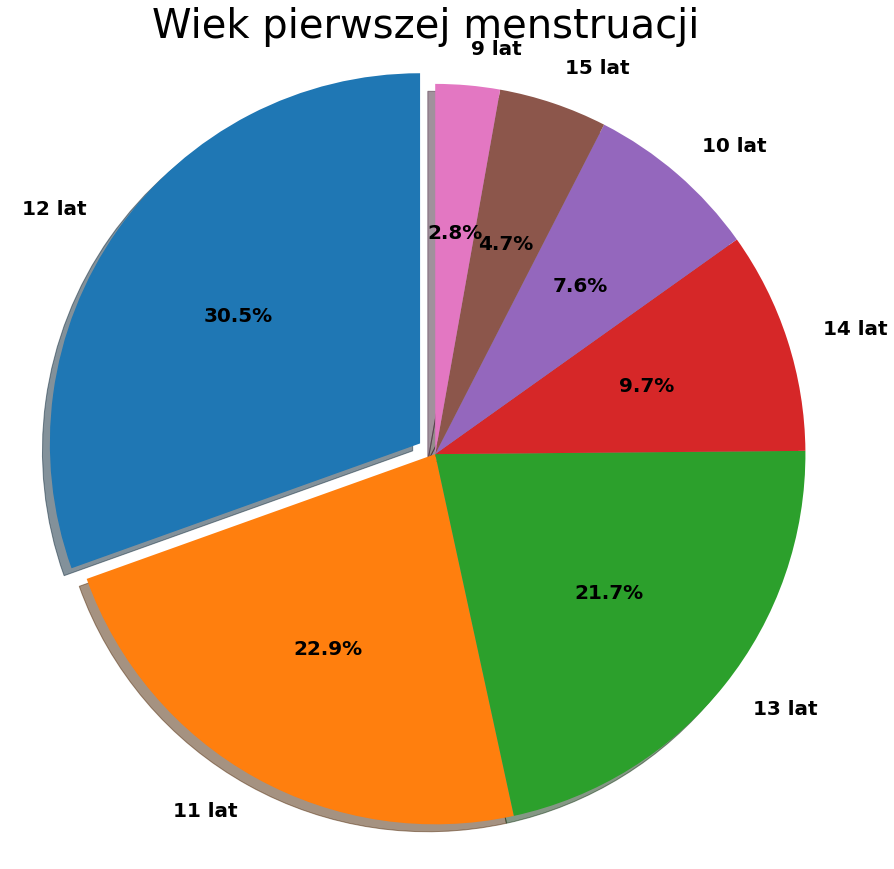

In [37]:
labels = ["12 lat","11 lat","13 lat","14 lat","10 lat","15 lat","9 lat"]
sizes = [380,286,271,121,95,59,35]
explode = (0.05, 0, 0, 0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 20, 'fontweight': 'heavy'})
ax1.set_title("Wiek pierwszej menstruacji",size=40)
fig = plt.gcf()
fig.set_size_inches(15,15)
ax1.axis('equal')
plt.show()